# Importing libraries

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import math

# importing the wine dataset

In [20]:
wine = datasets.load_wine()

In [21]:
data = wine.data
label = wine.target

# splitting the dataset

In [22]:
X_train,X_test,y_train,y_test = train_test_split(data,label,random_state=408)

# Applying the svm classifier on it

In [23]:
svm = SVC()
training_scores = cross_val_score(svm, X_train, y_train)
generalization_accuracy = sum(training_scores)/len(training_scores)
print("training scores:",training_scores)
print("The generalization training accuracy is:", generalization_accuracy)

training scores: [0.45652174 0.40909091 0.41860465]
The generalization training accuracy is: 0.4280724331280448


d:\python 3.7\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\python 3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python 3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\python 3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account bette

# fitting the data

In [24]:
svm.fit(X_train,y_train)

d:\python 3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
print(np.argmax(svm.decision_function(X_test), axis=1)!=y_test)
test_error_rate = sum(np.argmax(svm.decision_function(X_test), axis=1)!=y_test)/len(X_test)
print("test error rate is:", test_error_rate)

[False False  True False  True False False False  True False  True  True
 False False  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False  True  True  True False False  True False  True]
test error rate is: 0.4888888888888889


due to the fact that we did not tune the gamma and other parameters, we can see a higher test error than accuracy. this also shows that the result can be greatly improved

In [26]:
grid_parameter_search ={'svc__C': [0.001, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

min_max_scaler_value = MinMaxScaler()
standard_scaler_value = StandardScaler()
robust_scaler_value = RobustScaler()
normalizer = Normalizer()
scalers_to_calculate = (min_max_scaler_value, standard_scaler_value, robust_scaler_value, normalizer)
final_score = {}

for scaler in scalers_to_calculate:
    pipeline = make_pipeline(scaler, SVC())
    
    grid = GridSearchCV(pipeline, param_grid=grid_parameter_search, cv=5, iid='True')
    grid.fit(X_train, y_train)
    
    string_splitting = str(scaler).split("(")
    string_splitting = str(string_splitting[0])
    final_score[string_splitting] = (1 - grid.score(X_test,y_test), grid.best_params_)
    
print("test error rate and best parameters to use for MinMaxScaler:", final_score['MinMaxScaler'])
print("test error rate and best paramters to use for Standard Scaler :", final_score['StandardScaler'])
print("test error rate and best paramters to use for RobustScaler:", final_score['RobustScaler'])
print("test error rate and best paramters to use for Normalizer:", final_score['Normalizer'])

test error rate and best parameters to use for MinMaxScaler: (0.0, {'svc__C': 1, 'svc__gamma': 1})
test error rate and best paramters to use for Standard Scaler : (0.022222222222222254, {'svc__C': 10, 'svc__gamma': 0.01})
test error rate and best paramters to use for RobustScaler: (0.022222222222222254, {'svc__C': 10, 'svc__gamma': 0.01})
test error rate and best paramters to use for Normalizer: (0.022222222222222254, {'svc__C': 100, 'svc__gamma': 100})


In [27]:
svc = SVC()
param_grid ={'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_system = GridSearchCV(svc, param_grid=param_grid, cv=5, iid='True')
grid_system.fit(X_train, y_train)
final_scores = (1- grid_system.score(X_test,y_test), grid_system.best_params_)
print("test error rate and best param for non-normalized dataset", final_scores)

test error rate and best param for non-normalized dataset (0.1777777777777778, {'C': 100, 'gamma': 0.001})


In [28]:
svc = SVC(C=1, gamma=1)
folds_values = [3,5,10]
average_false_values = np.empty(0)
grid_param ={'svc__C': [0.001, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

for f in range(len(folds_values)):
    k_fold_value = KFold(shuffle=True, random_state=1504, n_splits=folds_values[f])
    alpha_values = np.empty(0)
    
    for rest_value_index, fold_value_index in k_fold_value.split(X_train):
        X_rest, X_fold, y_rest, y_fold = X_train[rest_value_index], X_train[fold_value_index], y_train[rest_value_index], y_train[fold_value_index]
        pipeline = make_pipeline(MinMaxScaler(), SVC())
        gridline_search = GridSearchCV(pipeline, param_grid=grid_param, cv=5, iid='True', n_jobs = -1)
        gridline_search.fit(X_rest, y_rest)
        
        conformity_scores = gridline_search.decision_function((X_fold))
        conformity_scores_calibrated = np.empty(len(conformity_scores))
        
        for index in range(len(conformity_scores)):
            conformity_scores_calibrated[index] = conformity_scores[index,y_fold[index]]
        X_test_value_for_conformity_scores = gridline_search.decision_function(X_test)
        
        for index in range(len(X_test)):
            for m in range(3):
                ranking = 0
                for i in range(len(X_fold)):
                    if X_test_value_for_conformity_scores[index,m] >= conformity_scores_calibrated[i]:
                        ranking += 1
                alpha_values = np.append(alpha_values,ranking)

    alpha_values = alpha_values.reshape(folds_values[f],len(X_test),3) 
    p_values_final = (sum(alpha_values)+1)/((len(X_fold)*folds_values[f])+1)
    final_false_p_value = 0
    for a in range (len(p_values_final)):
        final_false_p_value += np.sum(p_values_final[a]) - p_values_final[a,y_test[a]]
    average_false_values = np.append(average_false_values, (final_false_p_value/(p_values_final.shape[0]*(p_values_final.shape[1]-1))))
    
print("3 fold cross-conformal average p-value is:", average_false_values[0])
print("5 fold cross-conformal average p-value is:", average_false_values[1])
print("10 fold cross-conformal average p-value is:", average_false_values[2])

3 fold cross-conformal average p-value is: 0.008604845446950726
5 fold cross-conformal average p-value is: 0.00856658184902461
10 fold cross-conformal average p-value is: 0.008481764206955058


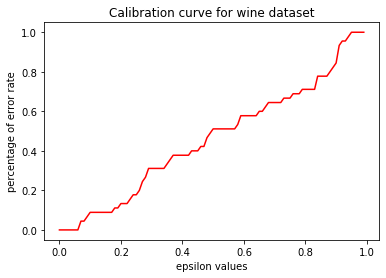

In [29]:
import matplotlib.pyplot as plt

epsilon_values = np.arange(0,1,0.01)
final_error_rate= np.empty(0)
for index in range(len(epsilon_values)):
    error_rate = 0 
    for i in range(len(X_test)):
        if p_values_final[i,y_test[i]] <= epsilon_values[index]:
            error_rate += 1
    final_error_rate = np.append(final_error_rate,(error_rate/len(X_test)))
    
plt.plot(epsilon_values,final_error_rate, color="r")
plt.xlabel("epsilon values")
plt.ylabel("percentage of error rate")
plt.title("Calibration curve for wine dataset")
plt.show()

as we can see the image in here, it is an ideal curve for the data that we have

# Results

- non normalized wine dataset accuracy: 0.4280724331280448
- non normalized wine dataset test error rate: 0.4888888888888889
- test error rate of Grid Search CV MinMaxScaler: 0.01
- test error rate of Grid Search CV StandardScaler: 0.022222222222222254
- test error rate of Grid Search CV no scaler: 0.1777777777777778
- average false p value for 10 fold for the cross-conformal prediction: 0.008481764206955058